In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json, os

In [4]:
run= 1
rhoseeds=np.array([0.16, 0.31, 0.62, 0.9, 1.03, 1.12]); nrhoseeds=len(rhoseeds)
Gamma0 = 5.00
Pii      = 0.1

def datadir(nrhoseed):
    return '../../data/model_Q_rho_dry/gamma0_{:1.2f}_rhoseed_{:1.2f}_pi_{:1.3f}/run_{:d}/'.format(Gamma0, rhoseeds[nrhoseed], Pii, run)
def savedir(run):
    return datadir(run)+'videos/'

if not os.path.isdir(savedir(0)):
    os.mkdir(savedir(0))

with open(datadir(0)+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
gamma     = parameters["gammaf"]   # traction coefficient
lambd     = parameters["lambda"]
#mu        = parameters["mu"]
p0        = parameters["p0"]       # pressure when cells are close packed, should be very high
r_p       = parameters["r_p"]      # rate of pressure growth equal to rate of growth of cells
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])

#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y)

dx = 1/mx; dy = 1/my

times = np.arange(0, n_dump, 1)*dt_dump

In [5]:
#ndump = 29; times = np.arange(0, ndump+1, 1)*dt_dump
rho = np.zeros([nrhoseeds, n_dump, mx, my])
#v   = np.zeros([ndump+1, mx, my, 2])
Q   = np.zeros([nrhoseeds, n_dump, mx, my, 2])
#Gamma = np.zeros([nrhoseeds,n_dump, mx, my])
#Pressure = np.zeros([nrhoseeds,n_dump, mx, my])

for r, rhoseed in enumerate(rhoseeds):
    for i, n in enumerate(np.arange(0, n_steps-1, dn_dump)):
        rho[r, i] += np.loadtxt(datadir(r)+'rho.csv.{:d}'.format(n), delimiter=',')
        #Gamma[i] += np.loadtxt(datadir+'Gamma.csv.{:d}'.format(n), delimiter=',')
        #Pressure[i] += np.loadtxt(datadir+'pressure.csv.{:d}'.format(n), delimiter=',')
        #v[n,:,:,0] += np.loadtxt(datadir+'vx_{:d}.csv'.format(n), delimiter=',')
        #v[n,:,:,1] += np.loadtxt(datadir+'vy_{:d}.csv'.format(n), delimiter=',')
        Q[r, i,:,:,0] += np.loadtxt(datadir(r)+'Qxx.csv.{:d}'.format(n), delimiter=',')
        Q[r, i,:,:,1] += np.loadtxt(datadir(r)+'Qxy.csv.{:d}'.format(n), delimiter=',')

S     = np.sqrt(2*(np.square(Q[...,0])+np.square(Q[...,1])))
theta = np.arctan2(Q[...,1], Q[...,0])/2
nx    = np.cos(theta)
ny    = np.sin(theta)

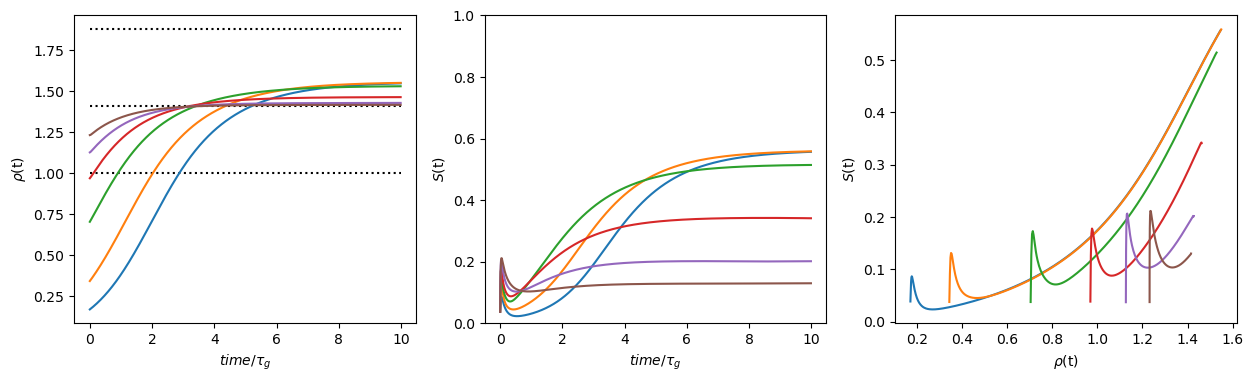

In [8]:
Rho = np.sum(np.sum(rho, axis=3), axis=2)*dx*dy #integrated rho over all space divided by unit area
Ssum= np.sum(np.sum(S, axis=3), axis=2)*dx*dy
fig, ax = plt.subplots(figsize=(15,4), ncols=3)
ax[0].plot(times, np.ones_like(times), linestyle='dotted', color='k')
ax[0].plot(times, np.ones_like(times)*rhonemend, linestyle='dotted', color='k')
ax[0].plot(times, np.ones_like(times)*rhoisoend, linestyle='dotted', color='k')
ax[0].plot(times, Rho.T); ax[0].set_xlabel(r'$time/\tau_g$'); ax[0].set_ylabel(r'$\rho$(t)');
ax[1].plot(times, Ssum.T); ax[1].set_xlabel(r'$time/\tau_g$'); ax[1].set_ylabel(r'$S$(t)');
ax[1].set_ylim(0,1);
ax[2].plot(Rho.T, Ssum.T); ax[2].set_xlabel(r'$\rho$(t)'); ax[2].set_ylabel(r'$S$(t)');